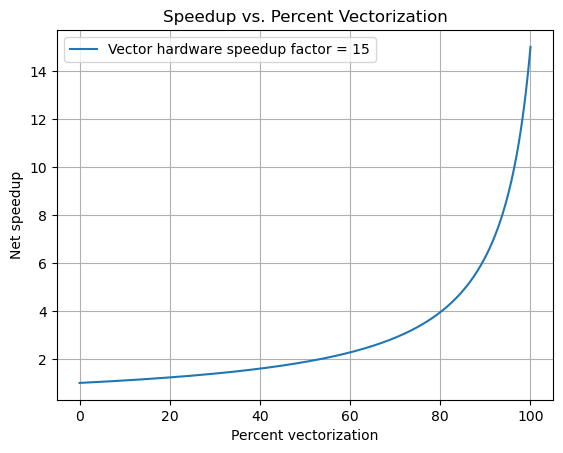

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Vector hardware speedup factor
speedup_factor = 15

# Create an array of percentage vectorization values from 0 to 100
percent_vectorization = np.linspace(0, 100, 500)

# Calculate the net speedup using the formula:
# Speedup = 1 / ((1 - vectorization) + (vectorization / speedup_factor))
vectorization_fraction = percent_vectorization / 100  # Convert to fraction
net_speedup = 1 / ((1 - vectorization_fraction) + (vectorization_fraction / speedup_factor))

# Plot the graph
plt.plot(percent_vectorization, net_speedup, label=f'Vector hardware speedup factor = {speedup_factor}')
plt.xlabel('Percent vectorization')
plt.ylabel('Net speedup')
plt.title('Speedup vs. Percent Vectorization')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
import numpy as np

t = np.array([1,2,3,4,5,6,7,8,9,10])
zt = np.array([50,30,20,10,8,5,4,3,2,1])
lnzt = np.log(zt)

mean_t = np.mean(t)
mean_lnzt = np.mean(lnzt)

beta1 = (np.sum((t - mean_t) * (lnzt - mean_lnzt)) / 
         np.sum((t - mean_t) ** 2))
beta0 = mean_lnzt - beta1 * mean_t

print("beta1:", beta1)
print("beta0:", beta0)
print(f"y ≈ {beta0:.4f} + {beta1:.4f}x")

beta1: -0.40526687397494787
beta0: 4.176814910672235
y ≈ 4.1768 + -0.4053x


In [10]:
p=2
(2.56/(0.7*p)) + (6.4/(0.7*p)) + (0.32/p)

6.5600000000000005

Given a data matrix X and vector beta compute a vector yhat:

    n = X. shape [0]
    yhat = np. zeros (n)
    for i in range (n):
        yhat [i] = beta [0]∗X[i ,0] +
         beta [1]∗X[i ,1] + 
         beta [2]∗X[i,1]∗X[i ,2]

In [2]:
import numpy as np

# Example dimensions and initialization
n = 100
p = 3  # Assuming beta has length 3 based on the problem description
X = np.random.rand(n, p)
beta = np.random.rand(3)

# Compute yhat
yhat = beta[0] * X[:, 0] + beta[1] * X[:, 1] + beta[2] * X[:, 1] * X[:, 2]
yhat





array([0.55753368, 1.0778476 , 1.03501685, 1.02208993, 1.03668441,
       1.05543054, 1.06232943, 0.35985006, 0.10694145, 0.88244359,
       0.86993927, 0.72470555, 0.72200656, 0.87547286, 0.3830313 ,
       0.49868008, 0.5930398 , 1.08401531, 0.88204789, 0.68276658,
       1.29150247, 0.99644778, 0.87736971, 0.46848911, 0.34221496,
       1.30209556, 0.46786862, 0.75277793, 0.76772742, 1.30965208,
       1.11596299, 0.71278578, 0.84298854, 0.4278319 , 0.42771433,
       1.13225596, 0.62039215, 0.70172792, 1.52705952, 1.05487522,
       0.57641362, 0.88331104, 0.66611067, 1.16871078, 0.78800673,
       0.10165713, 1.01979972, 0.98126384, 0.9990324 , 0.07423421,
       0.66701908, 1.21660856, 1.31139656, 0.69778764, 0.94365374,
       1.11326915, 0.63052363, 0.5757662 , 0.87974825, 0.92428304,
       0.66814666, 1.05718148, 1.35659415, 0.28397457, 0.3515304 ,
       1.0424858 , 0.43048769, 0.82733204, 1.18278155, 1.0912622 ,
       1.27319706, 1.01998455, 0.4746213 , 0.28400929, 0.38119

In [ ]:
import numpy as np

# Example dimensions and initialization
n = 100
m = 5
x = np.random.rand(n)
alpha = np.random.rand(m)
beta = np.random.rand(m)

# Vectorized computation of yhat
yhat = np.sum(alpha * np.exp(-beta * x[:, None]), axis=1)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np


def fit_exponential_model(u, y):
    u_train, u_test, y_train, y_test = train_test_split(u, y, test_size=0.5)
    
    dmax = 10
    
    lowest_mse = None
    
    for d in range(1, dmax + 1): # [1, 2, ..., d]
        X_train = np.exp(-np.arange(d).reshape(1, -1) * u_train.reshape(-1, 1) / d) # call reshape() to every broadcasting stuff just in case
        X_test = np.exp(-np.arange(d).reshape(1, -1) * u_test.reshape(-1, 1) / d) 
    
        model = LinearRegression()
        model.fit(X_train,y_train) # Fits a linear model for a data matrix X
        yhat = model.predict(X_test) # Predicts values
        mse = mean_squared_error(y_test, yhat)
        
        if lowest_mse is None or mse < lowest_mse:
            lowest_mse = mse
    
    return lowest_mse, model

np.random.seed(42)
u = np.linspace(0, 10, 100)  # 100 samples between 0 and 10
y = 5 * np.exp(-2 * u / 10) + np.random.normal(scale=0.2, size=u.shape)
lowest_mse, model = fit_exponential_model(u, y)
print(lowest_mse)

0.043968854253108855


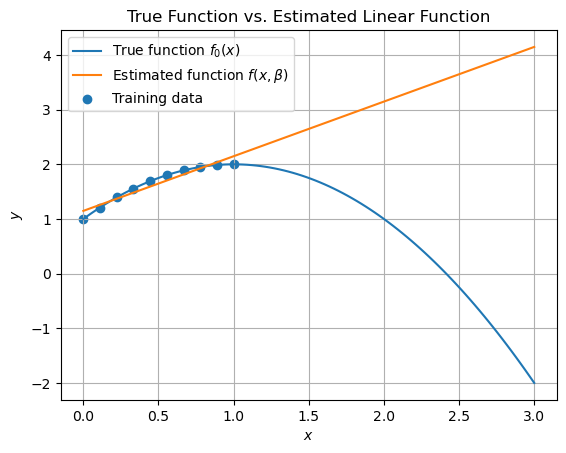

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

true_params = np.array([1, 2, -1])

def true_function(x):
    return true_params[0] + true_params[1] * x + true_params[2] * x**2

def estimated_function(x):
    return estimated_params[0] + estimated_params[1] * x

train_x = np.linspace(0, 1, 10)
train_y = true_function(train_x)

train_x_reshaped = train_x.reshape(-1, 1)  # Reshape just in case
linear_model = LinearRegression()
linear_model.fit(train_x_reshaped, train_y)

estimated_params = [linear_model.intercept_, linear_model.coef_[0]]


# prepare to plot
x_range = np.linspace(0, 3, 100)
y_true = true_function(x_range)
y_estimated = estimated_function(x_range)

plt.plot(x_range, y_true, label='True function $f_0(x)$')
plt.plot(x_range, y_estimated, label='Estimated function $f(x, \\beta)$')
plt.scatter(train_x, train_y, label='Training data')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('True Function vs. Estimated Linear Function')
plt.legend()
plt.grid(True)
plt.show()